In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import numpy as np
import mplcursors

# for fitting
from scipy.optimize import curve_fit

%matplotlib inline
# %matplotlib qt

sns.set_palette(sns.color_palette("colorblind"))
plt.rcParams.update({'font.size': 20})

In [2]:
#eventual functions go here

def specialplots(col,df):
    for index, row in df.iterrows():
        # draw rectangles
        if not np.isnan(row['min (J/m^2)']) and not np.isnan(row['min (m)']):
            # print('rectangle with '+str(row['Reference']))
            ax.add_patch(Rectangle((row['min (m)'], row['min (J/m^2)']),
                row['max (m)']-row['min (m)'],
                row['max (J/m^2)']-row['min (J/m^2)'],
                fc =col,
                ec=col,
                label=row['Reference'],
                alpha=0.5
                ))

        # draw vertical errorbars
        elif not np.isnan(row['min (J/m^2)']) and not np.isnan(row['value (m)']):
            # print('vertbar with '+str(row['Reference']))
            ax.vlines(x=row['value (m)'], ymin=row['min (J/m^2)'], ymax=row['max (J/m^2)'], colors=col, ls='-', lw=2, label=row['Reference'])

        # draw horizontal errorbars
        elif not np.isnan(row['min (m)']) and not np.isnan(row['value (J/m^2)']):
            # print('horbar with '+str(row['Reference']))
            ax.hlines(y=row['value (J/m^2)'], xmin=row['min (m)'], xmax=row['max (m)'], colors=col, ls='-', lw=2, label=row['Reference'])

In [3]:
# geology = pd.read_excel (r'merged_data.xlsx', sheet_name='geology')


geo_types={'Reference':'category'}
lab_types={'Reference':'category'}
mod_types={'Reference':'category'}
sei_types={'Reference M0, a':'category'}

geology = pd.read_csv('merged_data-geology.csv',sep=';',encoding='cp1252',dtype=geo_types)
laboratory = pd.read_csv('merged_data-laboratory.csv',sep=';',encoding='cp1252',dtype=lab_types)
models = pd.read_csv('merged_data-models.csv',sep=';',encoding='cp1252',dtype=mod_types)
seismology = pd.read_csv('merged_data-seismology.csv',sep=';',encoding='cp1252',dtype=sei_types)

# this part is fundamental because there are errors in data

geology[["value (m)"]] = geology[["value (m)"]].apply(pd.to_numeric,errors='coerce')
geology[["value (J/m^2)"]] = geology[["value (J/m^2)"]].apply(pd.to_numeric,errors='coerce')

laboratory[["value (m)"]] = laboratory[["value (m)"]].apply(pd.to_numeric,errors='coerce')
laboratory[["value (J/m^2)"]] = laboratory[["value (J/m^2)"]].apply(pd.to_numeric,errors='coerce')

models[["value (m)"]] = models[["value (m)"]].apply(pd.to_numeric,errors='coerce')
models[["value (J/m^2)"]] = models[["value (J/m^2)"]].apply(pd.to_numeric,errors='coerce')

seismology[["value (m)"]] = seismology[["value (m)"]].apply(pd.to_numeric,errors='coerce')
seismology[["value (J/m^2)"]] = seismology[["value (J/m^2)"]].apply(pd.to_numeric,errors='coerce')

# merger for galaxy plot with all data

seismology['Reference']=seismology['Reference M0, a']

geology['Origin']='geology'
laboratory['Origin']='laboratory'
models['Origin']='models'
seismology['Origin']='seismology'

df=pd.concat([
    geology[['value (m)','value (J/m^2)','type of energy','Reference','Origin']],
    laboratory[['value (m)','value (J/m^2)','type of energy','Reference','Origin']],
    models[['value (m)','value (J/m^2)','type of energy','Reference','Origin']],
    seismology[['value (m)','value (J/m^2)','type of energy','Reference','Origin']]
])

# Static plots

C:\Users\stear\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Text(0, 0.5, 'Energy density [$J/m^2$]')

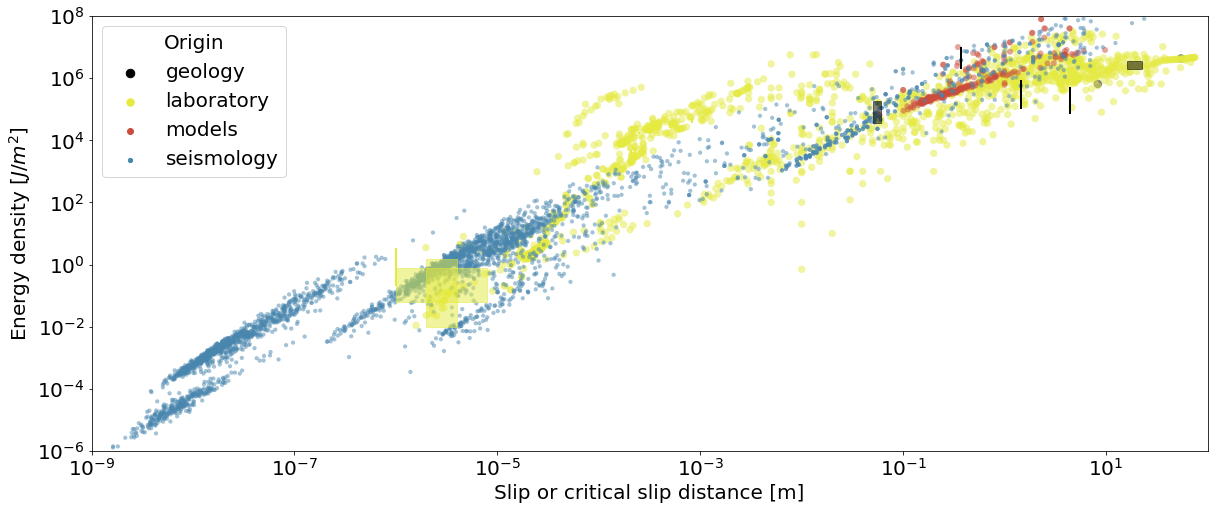

In [4]:
#GALAXY PLOT FOR ALL DATA

origin_col={'geology':'black','laboratory':'#e5ea3f','models':'#cb4c3b','seismology':'#4986ae'}

fig, ax = plt.subplots(figsize=(20,8))

sns.scatterplot(x='value (m)', y="value (J/m^2)", hue="Origin", size="Origin",palette=origin_col, data=df,linewidth=0, alpha = 0.5,legend='brief') 

ax.set_xscale('log')
ax.set_yscale('log')

#special plots
specialplots(origin_col['geology'],geology)
specialplots(origin_col['laboratory'],laboratory)

ax.set_ylim(1e-6,1e8)
ax.set_xlim(1e-9,1e2)
ax.set_xlabel('Slip or critical slip distance [m]')
ax.set_ylabel('Energy density [$J/m^2$]')

C:\Users\stear\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


Text(0, 0.5, 'Energy density [$J/m^2$]')

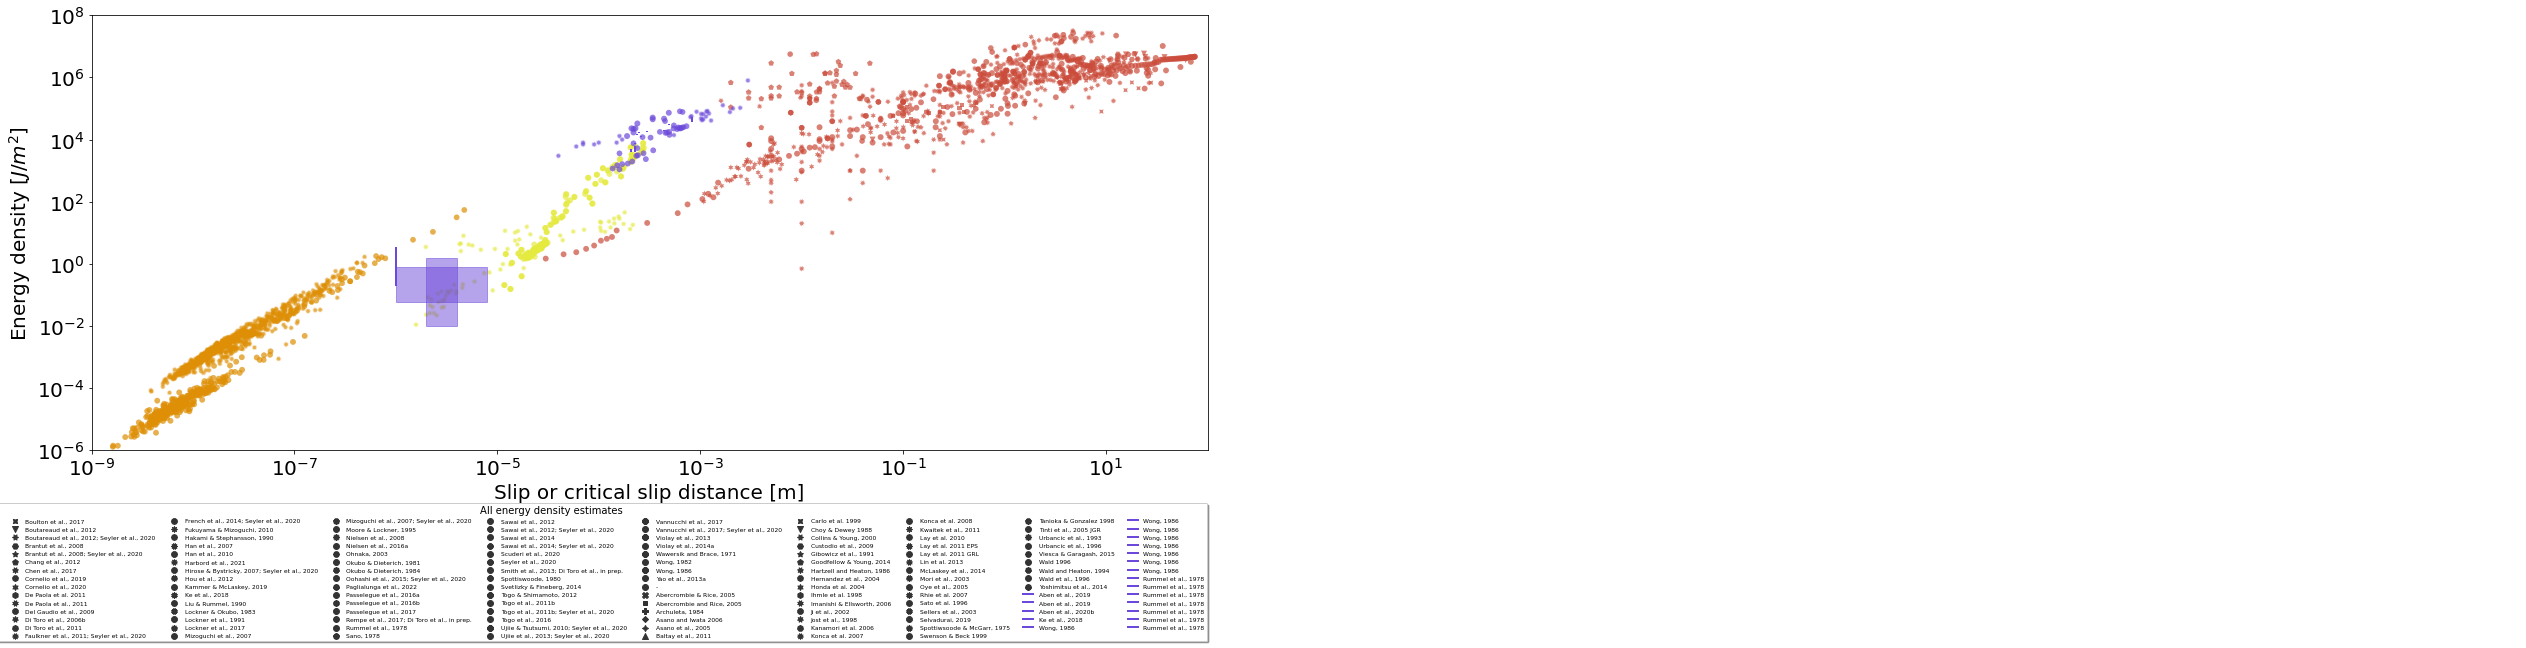

In [5]:
#GALAXY PLOT FOR THE LAB DATA

fig, ax = plt.subplots(figsize=(20,8))

group_col={'1':'#6c49da','2':'#e5ea3f','2b':'#a6ea3f','3':'#cb4c3b'}

sns.scatterplot(x='value (m)', y="value (J/m^2)", hue="Group",palette=group_col, data=laboratory,style="Reference",linewidth=0, alpha = 0.7,legend='brief') 

# G' from laboratory experiments
seismlab=seismology.loc[seismology['Type of seismic event'].str.contains("lab")]

sns.scatterplot(x='value (m)', y="value (J/m^2)", data=seismlab,style='Reference M0, a',linewidth=0, alpha = 0.7,legend='brief') 


ax.set_xscale('log')
ax.set_yscale('log')

#special plots
specialplots(group_col['1'],laboratory)

ax.legend(fontsize = 6, \
               bbox_to_anchor= (1, -.12), \
               title="All energy density estimates", \
               title_fontsize = 10, \
               shadow = True, \
               facecolor = 'white', \
               ncol=10,
               borderaxespad=0.1)


ax.set_ylim(1e-6,1e8)
ax.set_xlim(1e-9,1e2)
ax.set_xlabel('Slip or critical slip distance [m]')
ax.set_ylabel('Energy density [$J/m^2$]')

# Interactive plots
In the following section, we plot data in a window and use mplcursor to interrogate them.

In [6]:
# to consult data using mplcursor
%matplotlib qt

In [7]:
#try to have same colors for same Reference, grouped by Origin, Reference, type of energy

seismology['Reference']=seismology['Reference M0, a']

geology['Origin']='geology'
laboratory['Origin']='laboratory'
models['Origin']='models'
seismology['Origin']='seismology'

df=pd.concat([
    geology[['value (m)','value (J/m^2)','type of energy','Reference','Origin']],
    laboratory[['value (m)','value (J/m^2)','type of energy','Reference','Origin']],
    models[['value (m)','value (J/m^2)','type of energy','Reference','Origin']],
    seismology[['value (m)','value (J/m^2)','type of energy','Reference','Origin']]
])
df.set_index('value (m)',inplace=True)

names=df['Reference'].unique()
names=names.tolist()

fig, ax = plt.subplots(figsize=(20,8))
specialplots('r',geology)
specialplots('b',laboratory)

df.groupby(['Origin','Reference','type of energy'])['value (J/m^2)'].plot(ax=ax,marker='o',lw=0,alpha=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e-6,1e11)
ax.set_xlim(1e-9,1e2)
ax.set_xlabel('Slip or critical slip distance [m]')
ax.set_ylabel('Energy density [$J/m^2$]')

mplcursors.cursor(hover=True)

In [8]:
# FIGURE for laboratory estimates (to navigate the plot), grouped by sample, material, Reference, type of energy

fig, ax = plt.subplots(figsize=(20,8))

specialplots('b',laboratory)

lab2=laboratory.set_index('value (m)')
lab2.groupby(['sample','material','Reference','type of energy'])['value (J/m^2)'].plot(ax=ax,marker='o',lw=0,alpha=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e-6,1e11)
ax.set_xlim(1e-9,1e2)
ax.set_xlabel('Slip or critical slip distance [m]')
ax.set_ylabel('Energy density [$J/m^2$]')

mplcursors.cursor(hover=True)

C:\Users\stear\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


In [9]:
# FIGURE for laboratory estimates (to navigate the plot), grouped by Group, Reference, type of energy

fig, ax = plt.subplots(figsize=(20,8))

specialplots('b',laboratory)

lab2=laboratory.set_index('value (m)')
lab2.groupby(['Group','Reference','type of energy'])['value (J/m^2)'].plot(ax=ax,marker='o',lw=0,alpha=0.5)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e-6,1e11)
ax.set_xlim(1e-9,1e2)
ax.set_xlabel('Slip or critical slip distance [m]')
ax.set_ylabel('Energy density [$J/m^2$]')

mplcursors.cursor(hover=True)

C:\Users\stear\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\axes\_base.py:2283: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
